In [1]:
import numpy as np
import pandas as pd


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

iris = iris.data.original

In [3]:
iris.head(100)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [4]:
iris.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [5]:
categorical = [var for var in iris.columns if iris[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 1 categorical variables

The categorical variables are : ['class']


In [6]:
iris[categorical].head()

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [7]:
iris[categorical].isnull().sum()

class    0
dtype: int64

In [8]:
iris.shape

(150, 5)

In [9]:
# find numerical variables

numerical = [var for var in iris.columns if iris[var].dtype!='O' and var!='class' ]

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 4 numerical variables

The numerical variables are : ['sepal length', 'sepal width', 'petal length', 'petal width']


In [10]:
iris[numerical].head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
iris[numerical].isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
dtype: int64

In [12]:
# Separate features and target class
X = iris
y = iris['class']

# Identify numerical and categorical columns
numeric_features = numerical
categorical_features = categorical

# Define preprocessing steps for numerical and categorical columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Standardize numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('onehot', OneHotEncoder())  # One-hot encode categorical features
])

# Combine preprocessing steps for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # Pass through columns not specified in transformers
)

# Apply preprocessing to the features only
X_preprocessed = preprocessor.fit_transform(X)

# Get the names of transformed columns
transformed_feature_names = list(numeric_features) + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))

# Create a DataFrame with transformed features
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=transformed_feature_names + list(X.columns[len(transformed_feature_names):]))

In [13]:
print(X_preprocessed_df)

     sepal length  sepal width  petal length  petal width  class_Iris-setosa  \
0       -0.900681     1.032057     -1.341272    -1.312977                1.0   
1       -1.143017    -0.124958     -1.341272    -1.312977                1.0   
2       -1.385353     0.337848     -1.398138    -1.312977                1.0   
3       -1.506521     0.106445     -1.284407    -1.312977                1.0   
4       -1.021849     1.263460     -1.341272    -1.312977                1.0   
..            ...          ...           ...          ...                ...   
145      1.038005    -0.124958      0.819624     1.447956                0.0   
146      0.553333    -1.281972      0.705893     0.922064                0.0   
147      0.795669    -0.124958      0.819624     1.053537                0.0   
148      0.432165     0.800654      0.933356     1.447956                0.0   
149      0.068662    -0.124958      0.762759     0.790591                0.0   

     class_Iris-versicolor  class_Iris-

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed_df, y, test_size=0.2, random_state=42) # 80% training and 20% test

# DECISION TREE

In [15]:
from sklearn.model_selection import GridSearchCV
dt_clf = DecisionTreeClassifier()

In [16]:
# Hyper tuning for Decision Tree classifier
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(1,25)),
    'min_samples_leaf': list(range(1,20))
}

grid_serach_dt = GridSearchCV(estimator = dt_clf,
                           param_grid = params,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

grid_serach_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [17]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_serach_dt.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_serach_dt.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_serach_dt.best_estimator_))

GridSearch CV best score : 1.0000


Parameters that give the best results : 

 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1}


Estimator that was chosen by the search : 

 DecisionTreeClassifier(max_depth=2)


In [18]:
# Create Decision Tree classifer object
dt_clf = DecisionTreeClassifier(criterion='entropy',max_depth=2, min_samples_leaf=1, random_state=42)
# Train Decision Tree Classifer
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

In [19]:
print('Training set score: {:.4f}'.format(dt_clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dt_clf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)
accuracy=dt_clf.score(X_test,y_test)
print("\nThe accuracy of decision tree classifier dataset is "+str(round(accuracy*100,2))+"%")

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

The accuracy of decision tree classifier dataset is 100.0%


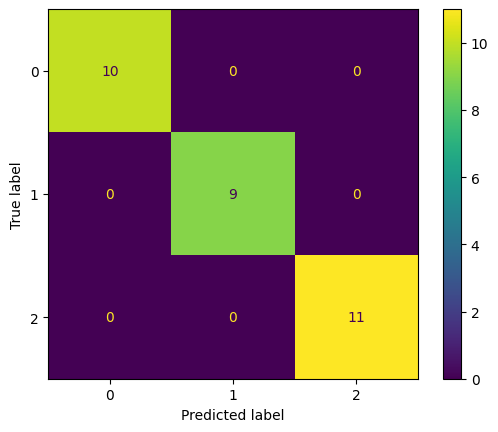

In [21]:
cm_display =  ConfusionMatrixDisplay(confusion_matrix = conf_mat)
cm_display.plot()
plt.show()

In [22]:
y_pred_lr = dt_clf.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Decision Tree Classifier report: 

                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# NAIVE BAYES

In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
nb_clf = GaussianNB()

In [25]:
# Hyper tuning for Decision Tree classifier
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

grid_serach_nb = GridSearchCV(estimator = nb_clf,
                           param_grid = params_NB,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=1)

grid_serach_nb.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [26]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_serach_nb.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_serach_nb.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_serach_nb.best_estimator_))

GridSearch CV best score : 1.0000


Parameters that give the best results : 

 {'var_smoothing': 0.43287612810830584}


Estimator that was chosen by the search : 

 GaussianNB(var_smoothing=0.43287612810830584)


In [27]:
nb_clf = GaussianNB(var_smoothing=0.43287612810830584)
nb_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)
print('Training set score: {:.4f}'.format(nb_clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(nb_clf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)
accuracy=nb_clf.score(X_test,y_test)
print("\nThe accuracy of  Naive bayes classifier on dataset is "+str(round(accuracy*100,2))+"%")

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

The accuracy of  Naive bayes classifier on dataset is 100.0%


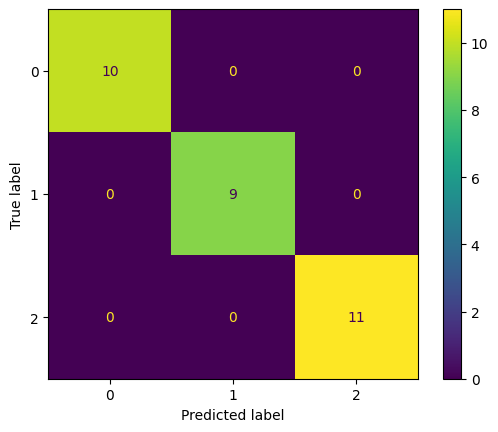

In [29]:
cm_display =  ConfusionMatrixDisplay(confusion_matrix = conf_mat)
cm_display.plot()
plt.show()

In [30]:
y_pred_lr = nb_clf.predict(X_test)
print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Naive Bayes Classifier report: 

                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# SVM(Support Vector Machine)

In [31]:
from sklearn.svm import SVC
svm_clf = SVC(C=1)

In [32]:
param_grid = [
  {'kernel':['linear']},
  {'kernel':['rbf'], 'gamma':[0.001, 0.0001]}
]

In [33]:
grid_serach_svm = GridSearchCV(estimator = svm_clf,
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=1)

grid_serach_svm.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=SVC(C=1),
             param_grid=[{'kernel': ['linear']},
                         {'gamma': [0.001, 0.0001], 'kernel': ['rbf']}],
             scoring='accuracy', verbose=1)

In [34]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_serach_svm.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_serach_svm.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_serach_svm.best_estimator_))

GridSearch CV best score : 1.0000


Parameters that give the best results : 

 {'kernel': 'linear'}


Estimator that was chosen by the search : 

 SVC(C=1, kernel='linear')


In [35]:
svm_clf = SVC(C=1, kernel='linear')

In [36]:
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
print('Training set score: {:.4f}'.format(svm_clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(svm_clf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)
accuracy=svm_clf.score(X_test,y_test)
print("\nThe accuracy of SVM classifier  on  dataset is "+str(round(accuracy*100,2))+"%")

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

The accuracy of SVM classifier  on  dataset is 100.0%


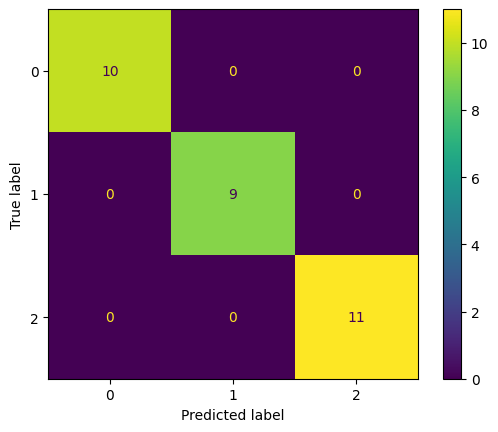

In [38]:
cm_display =  ConfusionMatrixDisplay(confusion_matrix = conf_mat)
cm_display.plot()
plt.show()

In [39]:
y_pred_lr = svm_clf.predict(X_test)
print("SVM Classifier report: \n\n", classification_report(y_test, y_pred_lr))

SVM Classifier report: 

                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

In [41]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid_serach_knn = GridSearchCV(estimator = knn_clf,
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=1)

grid_serach_knn.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=1)

In [42]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_serach_knn.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_serach_knn.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_serach_knn.best_estimator_))

GridSearch CV best score : 1.0000


Parameters that give the best results : 

 {'n_neighbors': 1}


Estimator that was chosen by the search : 

 KNeighborsClassifier(n_neighbors=1)


In [43]:
knn_clf = KNeighborsClassifier(n_neighbors=1)

In [44]:
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
print('Training set score: {:.4f}'.format(knn_clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn_clf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)
accuracy=knn_clf.score(X_test,y_test)
print("\nThe accuracy of KNN classifier  on  dataset is "+str(round(accuracy*100,2))+"%")

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

The accuracy of KNN classifier  on  dataset is 100.0%


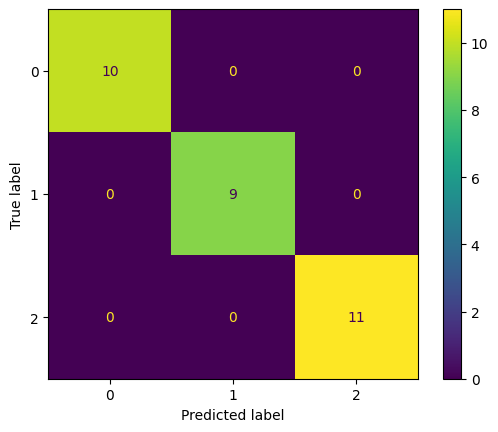

In [46]:
cm_display =  ConfusionMatrixDisplay(confusion_matrix = conf_mat)
cm_display.plot()
plt.show()

In [47]:
y_pred_lr = knn_clf.predict(X_test)
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_lr))

KNN Classifier report: 

                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [48]:
cart = DecisionTreeClassifier()

# Hyper tuning for Decision Tree classifier
params = {
    'criterion': ['gini'],
    'max_depth': list(range(1,25)),
    'min_samples_leaf': list(range(1,20))
}

grid_serach_cart = GridSearchCV(estimator = cart,
                           param_grid = params,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

grid_serach_cart.fit(X_train, y_train)



# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_serach_cart.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_serach_cart.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_serach_cart.best_estimator_))

GridSearch CV best score : 1.0000


Parameters that give the best results : 

 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1}


Estimator that was chosen by the search : 

 DecisionTreeClassifier(max_depth=2)


In [49]:
cart = DecisionTreeClassifier(max_depth=2)
cart.fit(X_train, y_train)
y_pred = cart.predict(X_test)
print('Training set score: {:.4f}'.format(cart.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(cart.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


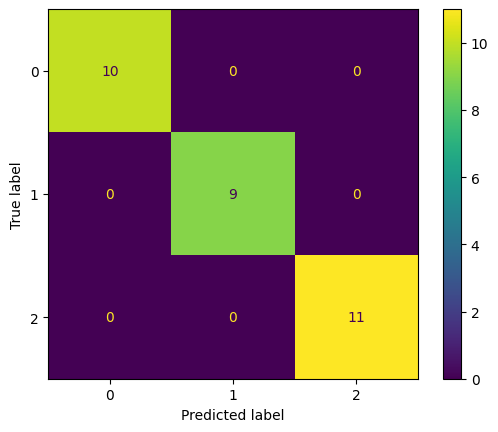

In [50]:
cm_display =  ConfusionMatrixDisplay(confusion_matrix = conf_mat)
cm_display.plot()
plt.show()

In [51]:
y_pred_lr = cart.predict(X_test)
print("CART Classifier report: \n\n", classification_report(y_test, y_pred_lr))

CART Classifier report: 

                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

